# Data Exploration

## Overview

In this notebook we'll visualise the distribution of the variables in our dataset to try and gain some insight. 

TLDR:
Main factors which can indicate poverty:
* Material: Floor material, having a ceiling, what energy supply you use for coking, owning a television or refrigirator.
* Social: Low levels of education, more women than men.
* Household: Overcrowding, more young people (absolutely and as a proportion of the household), a woman as the head of household.

### Load Libraries

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

---
Load the training data and take a look at the columns

In [26]:
train = pd.read_csv('data/cleaned_train.csv')

In [28]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2',
       'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize',
       'cielorazo', 'dis', 'idhogar', 'hogar_nin', 'hogar_adul', 'hogar_mayor',
       'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms',
       'overcrowding', 'computer', 'television', 'mobilephone', 'qmobilephone',
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq', 'Target', 'rez_esc_MISSING', 'v2a1_MISSING', 'building_mat',
       'floor_mat', 'roof_mat', 'water_supply', 'elec_supply', 'sanit_supply',
       'cook_energy', 'rubbish_disposal', 'wall_quality', 'roof_quality',
       'floor_quality', 'gender', 'relationship_status', 'family_role',
       'edu_level', 'home_own_status', 'region', 'urban_rural'],
      dtype='object')

These variables can be broken down as:

### Nominal Categorical
'floor_mat', 'roof_mat','water_supply', 'elec_supply', 'sanit_supply', 'cook_energy',
'rubbish_disposal', 'relationship_status', 'family_role', 'home_own_status', 'region', 'urban_rural' 

## Ordinal Categorical
'wall_quality', 'roof_quality', 'floor_quality', 'edu_level',

## Continuous
'edjefa', 'edjefe', 'dependency', 'meaneduc', 'overcrowding', 'v2a1', 'age'

## Discrete
'bedrooms', 'escolari', 'hhsize', 'hogar_adul', 'hogar_mayor', 'hogar_nin', 'hogar_total',
'qmobilephone', 'rez_esc', 'rooms', 'tamhog', 'tamviv', 'v18q1',
'r4h1', 'r4h2', 'r4h3',
'r4m1', 'r4m2', 'r4m3', 
'r4t1', 'r4t2', 'r4t3',

## Binary Variables
'dis', 'gender', 'hacapo', 'hacdor',

## Binary (ownership variables)
'cielorazo', 'computer', 'mobilephone', 'refrig', 'television', 'v14a', 'v18q'

## Distribution of Target Class

We can see that the distribution of the target classes is heavily skewed. Towards the Nonvulnerable' class. For this reason most distributions going foward will be realtive to that target class so it is easy to compare distributions of different sample size.

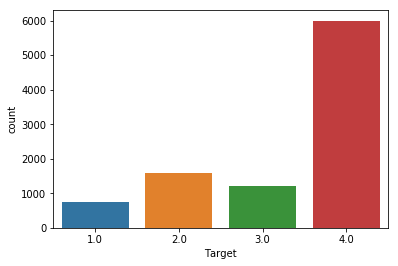

In [81]:
sns.countplot(x='Target', data=train)
plt.show()

---
## Examining Nominal Categorical Distributions

In [90]:
a = pd.Categorical(train.floor_mat, ordered=True)
#dir(a)



======= floor_mat =======


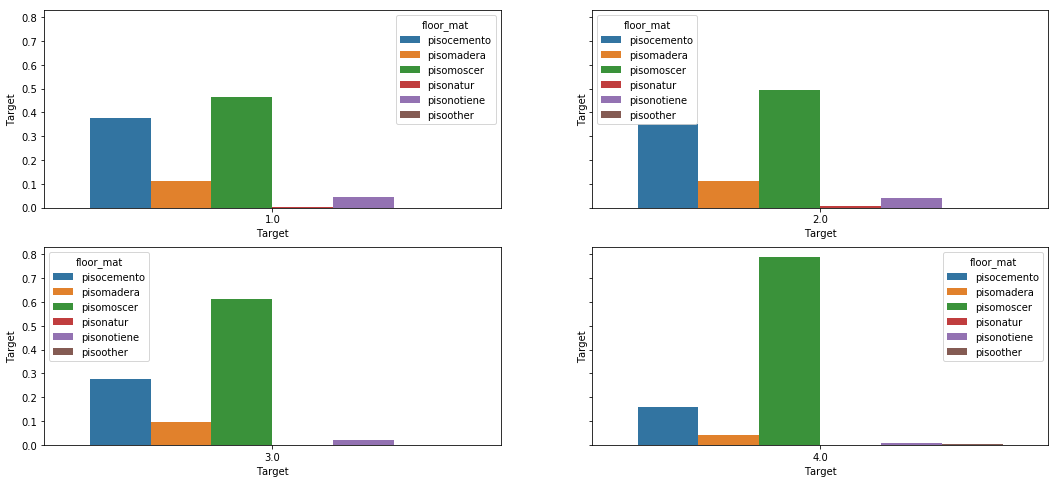



======= roof_mat =======


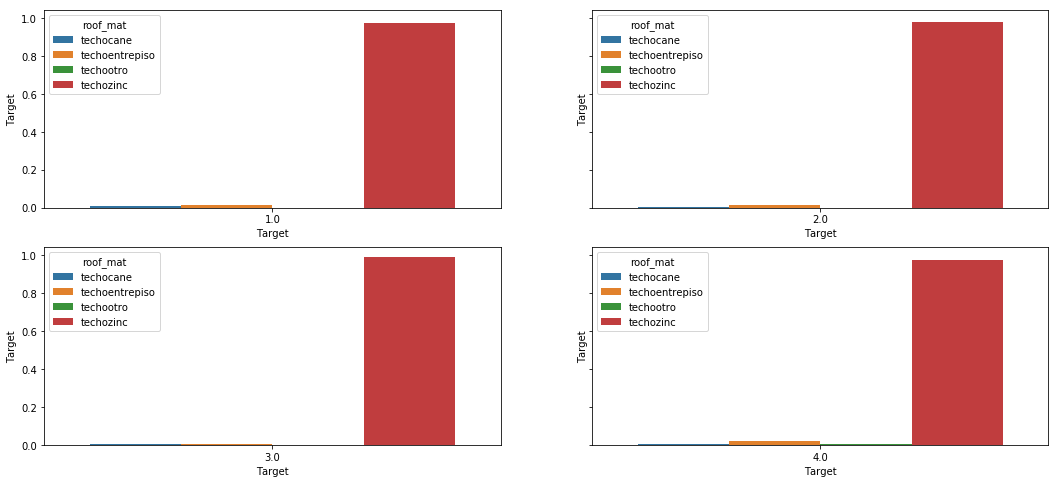



======= water_supply =======


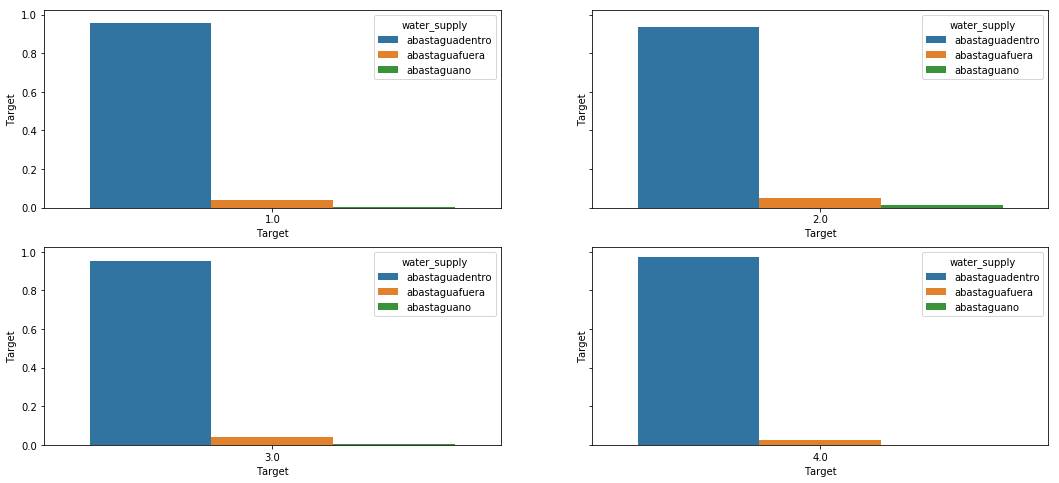



======= elec_supply =======


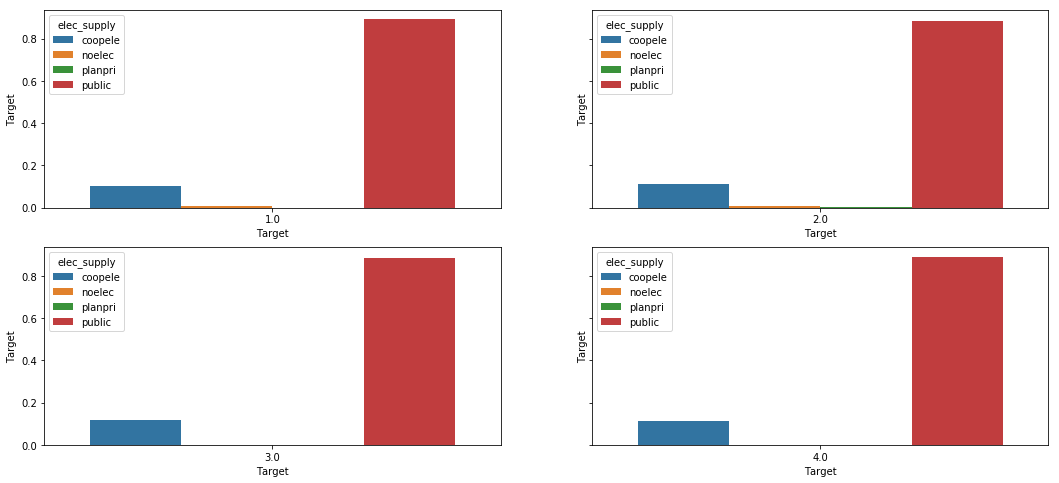



======= sanit_supply =======


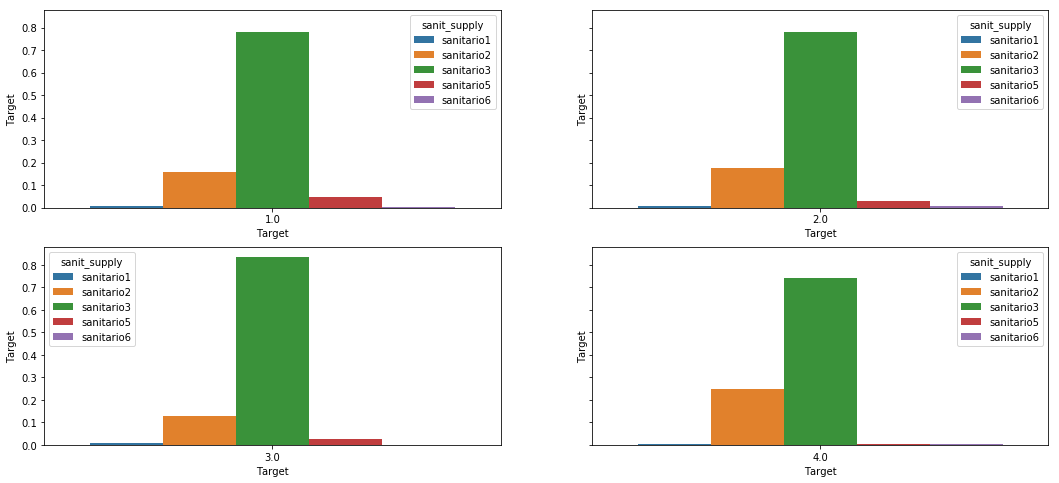



======= cook_energy =======


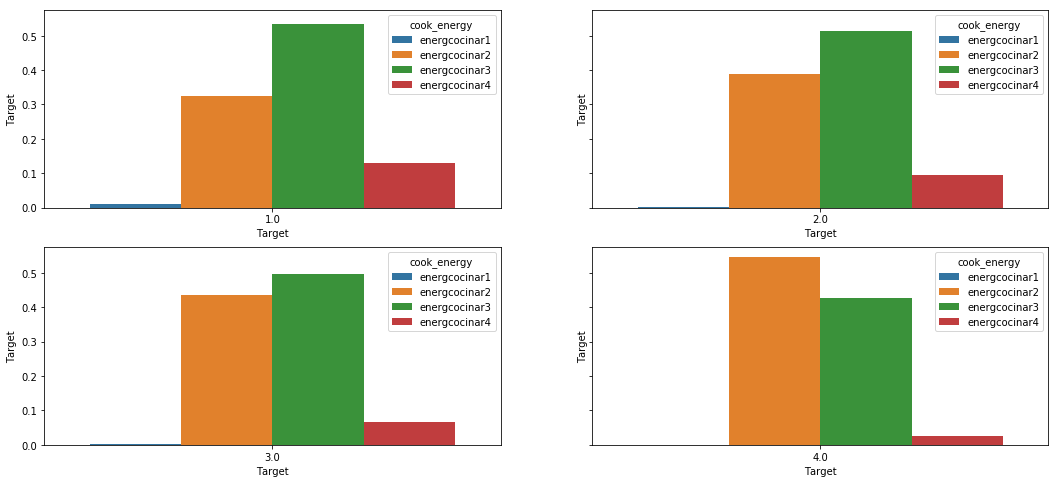



======= rubbish_disposal =======


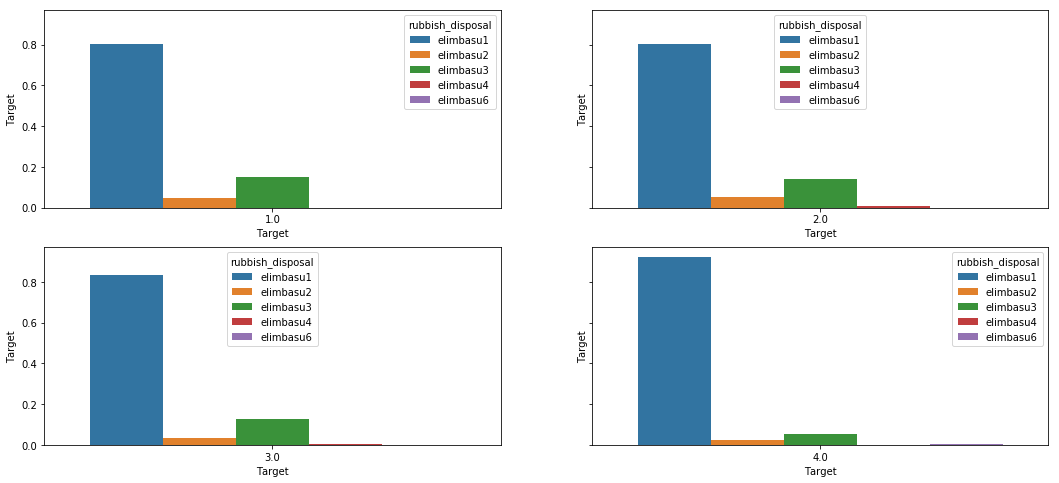



======= relationship_status =======


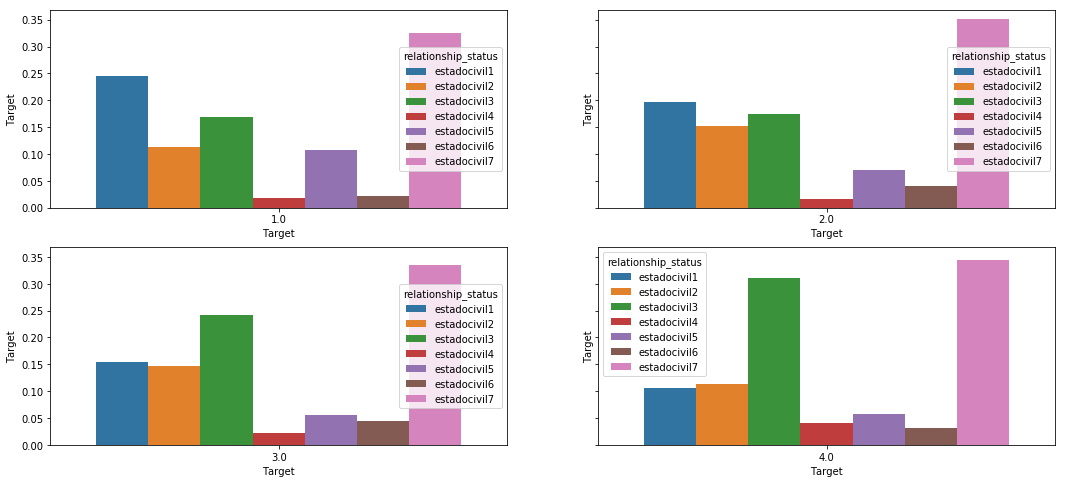



======= family_role =======


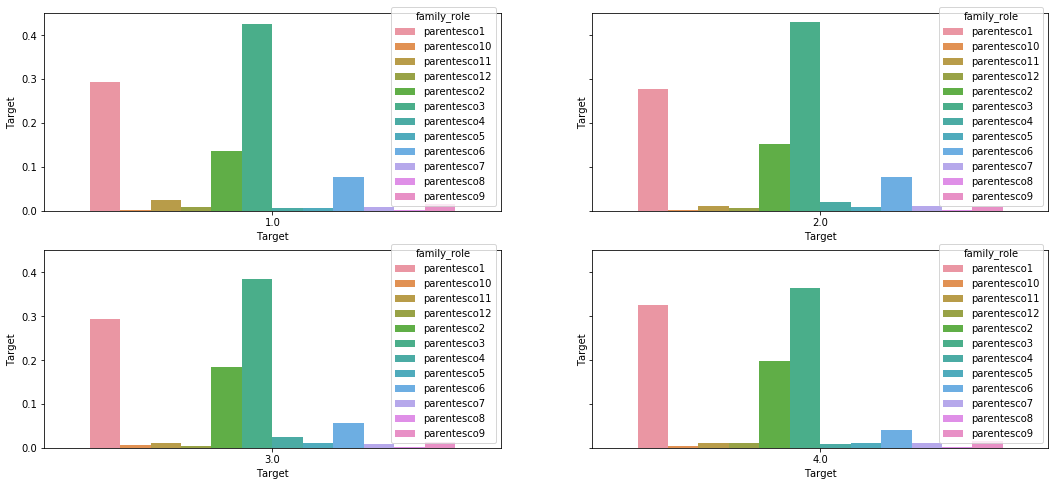



======= home_own_status =======


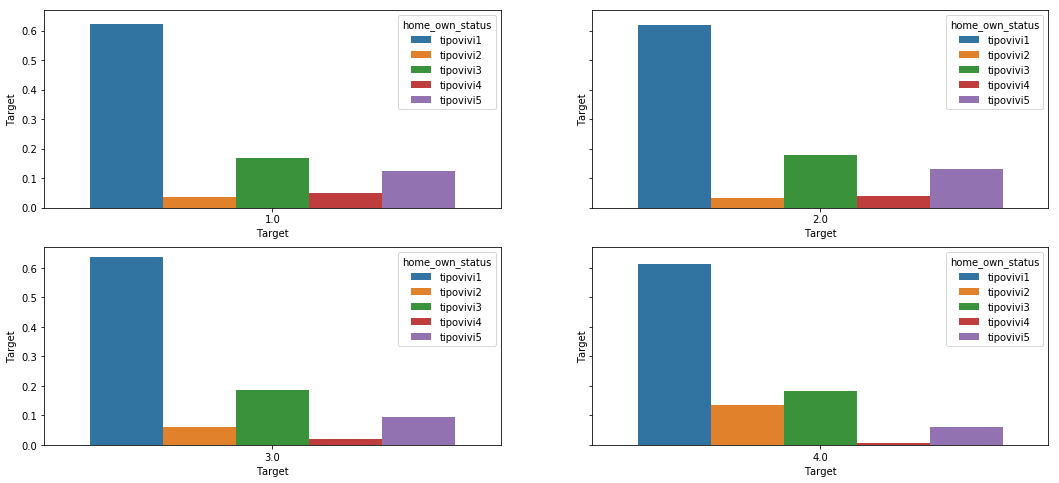



======= region =======


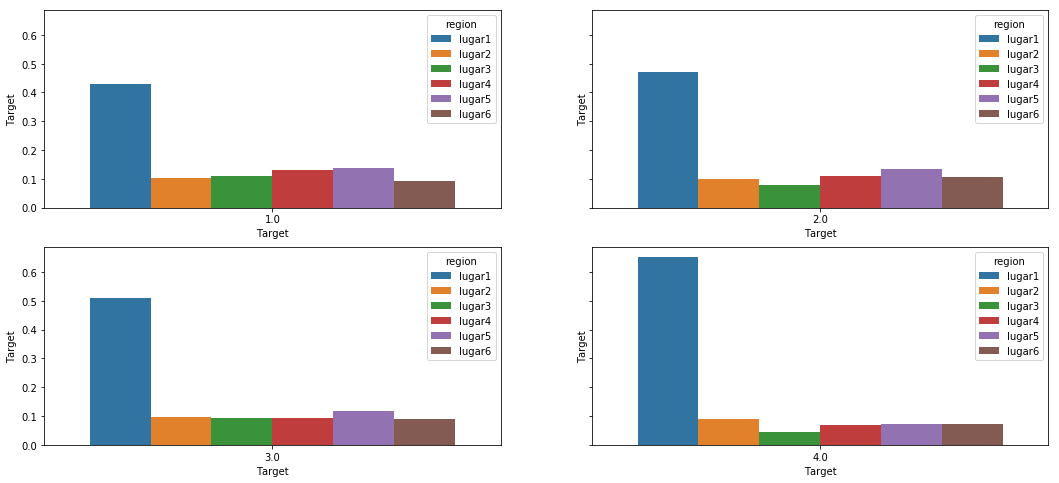



======= urban_rural =======


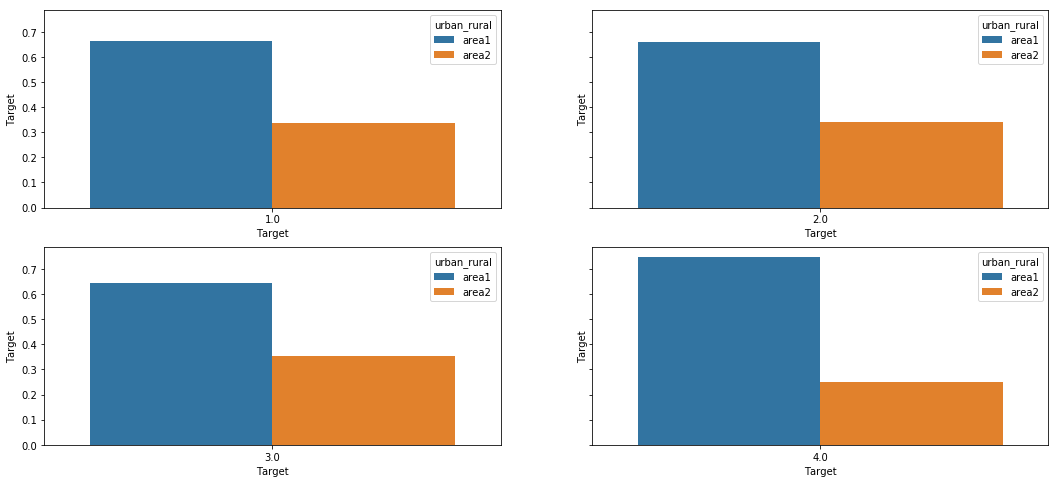

In [91]:
variables = ['floor_mat', 'roof_mat','water_supply', 'elec_supply', 'sanit_supply', 
             'cook_energy', 'rubbish_disposal', 'relationship_status', 'family_role', 
             'home_own_status', 'region', 'urban_rural']

def norm_categorical_grid_plot(df ,variable):
    cords = [(0, 0), (0, 1), (1, 0), (1, 1)]
    f, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=True)
    for i, (x, y) in enumerate(cords):
        tar = df[df.Target == i + 1]
        sns.barplot(x='Target', y='Target', hue=variable, data=tar,
                    estimator=lambda x:len(x)/len(tar), ax=axes[x][y])
    plt.show()
    
        
for vr in variables:
    print('\n\n======= {} ======='.format(vr))
    train[vr] = pd.Categorical(train[vr], ordered=True)
    norm_categorical_grid_plot(train, vr)

### Important Variabels
* Floor material - mosaic/cermac/terrazo is less associated with povery, cement/wood/no floor more likely to indicate poverty
* Cooking energy - More use of electricity is less associated with poverty, gas/wood more associated, none is indicator of extreme poverty

### Interesting
* Home ownership - Similar rates of ownership at all levels, but for those who don't own renting becomes more common as poverty increases, and paying installments to own becomes less common.
* Sanitary - Relationships are not necessarily linear, using a sewr/cesspool is more common in moderate poverty than extremem poverty, but is less common in vulernable, and is most common in nonvulnerable
* Relationship status - Coupled unions and people too young to be counted are more common as poverty increases, with married more common as poverty decreases

### Little Importance
* Roof, water supply, energy supply, waste, region and rural/urban all show little changes in distribution except for values which become slightly more common at the extremes (e.g. living in the central region, having no energy supply).

---
## Ordinal Categorical



======= wall_quality ======


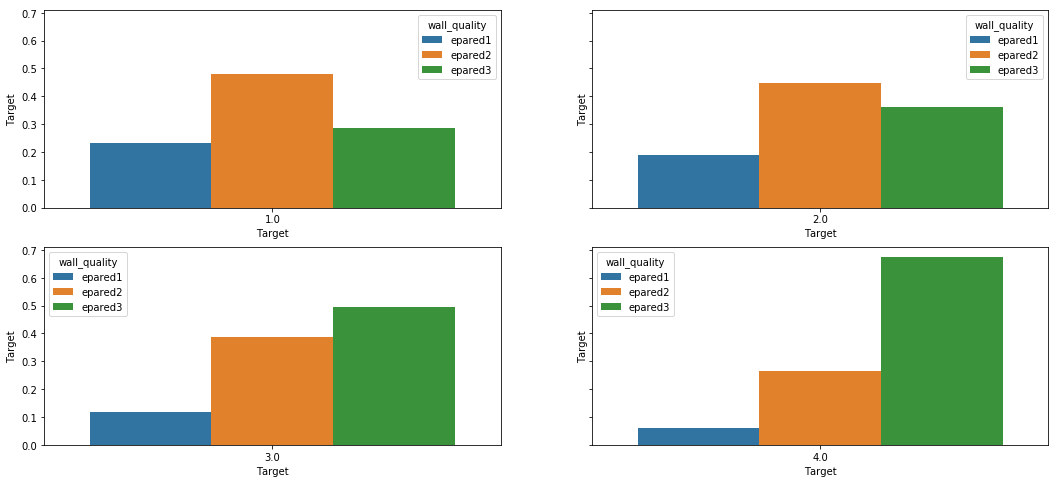



======= roof_quality ======


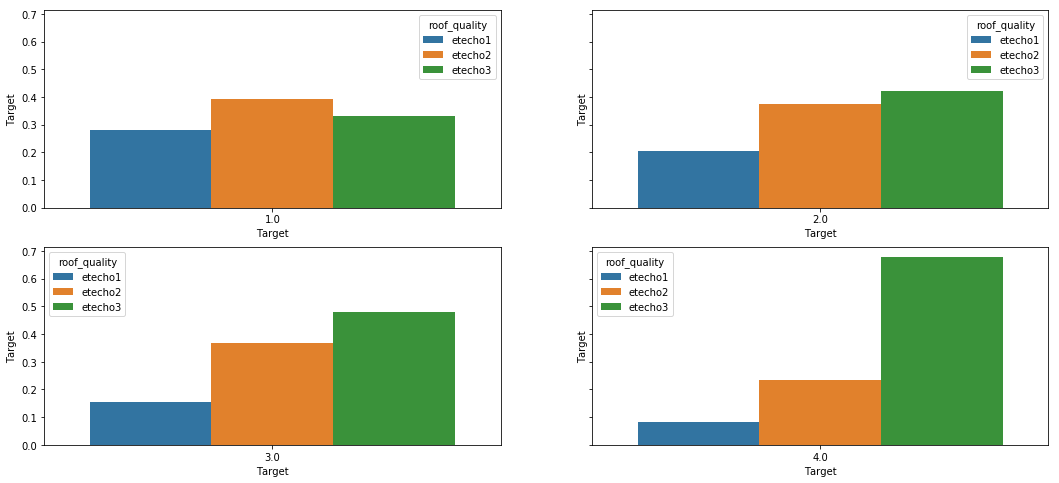



======= floor_quality ======


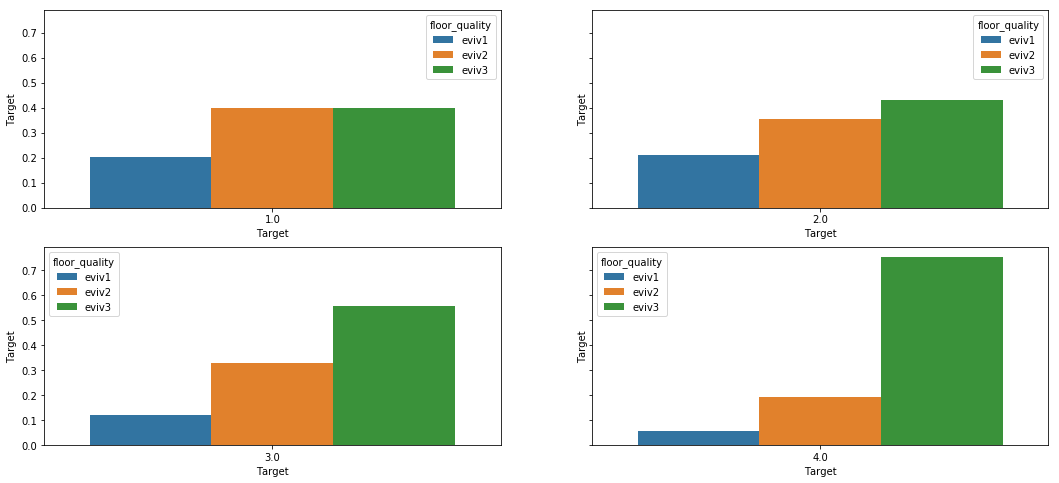



======= edu_level ======


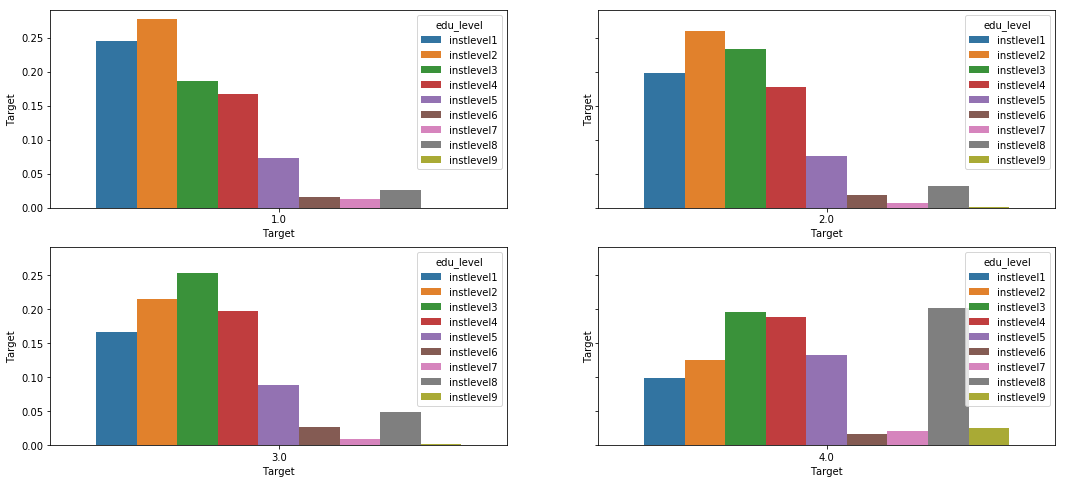

In [92]:
variables = ['wall_quality', 'roof_quality', 'floor_quality', 'edu_level']

for vr in variables:
    print('\n\n======= {} ======'.format(vr))
    train[vr] = pd.Categorical(train[vr], ordered=True)
    norm_categorical_grid_plot(train, vr)

Most results are unsurprising, quality increases as households become more insulated from poverty. Education follows a similar trend, the sharp divide between classes 1-3, and 4 is notable in the percentage who have completed some higher education (instlevel7)

---
## Continuous Numeric



======= edjefa =======


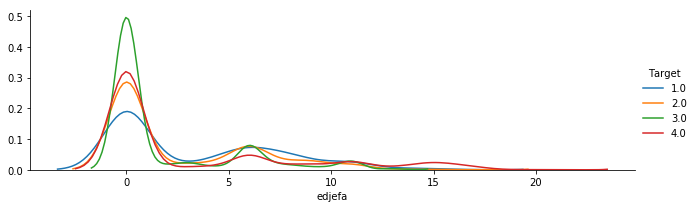



======= edjefe =======


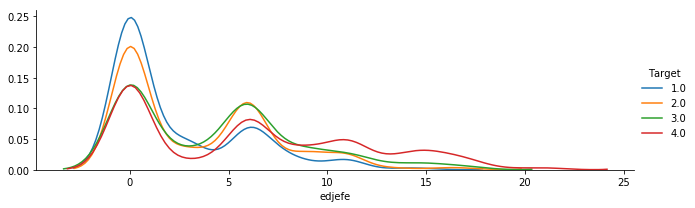



======= dependency =======


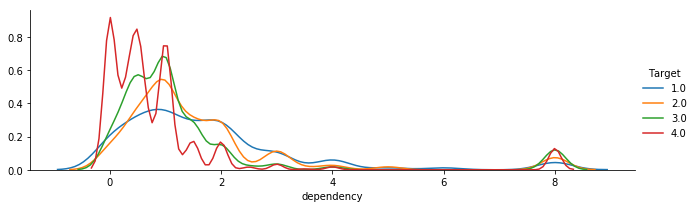



======= meaneduc =======


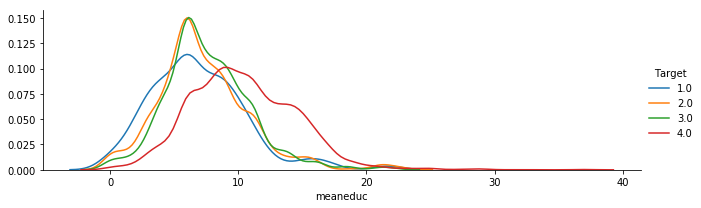



======= overcrowding =======


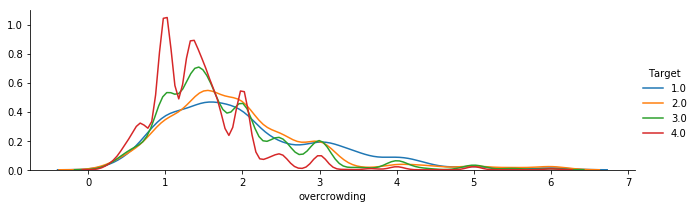



======= v2a1 =======


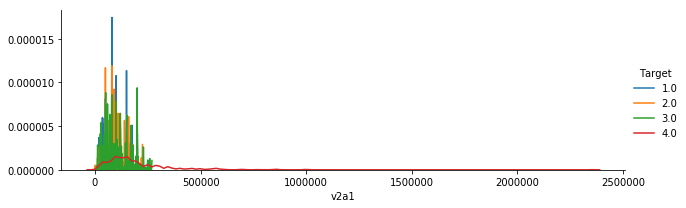



======= age =======


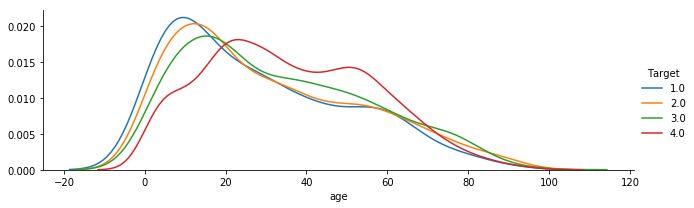

In [93]:
variables = ['edjefa', 'edjefe', 'dependency', 'meaneduc', 'overcrowding', 'v2a1', 'age']

for vr in variables:
    print('\n\n======= {} ======='.format(vr))
    ft = sns.FacetGrid(train, hue='Target', aspect=3)
    ft.map(sns.kdeplot, vr).add_legend()
    plt.show()

From the above graph it seems like the following become more true at increasing levels of poverty:
* A woman is the head of the household
* The head of the household has a less education
* There are more young people, and young people relative to adults
* Households are overcrowded

---
## Discrete Numeric



======= bedrooms =======


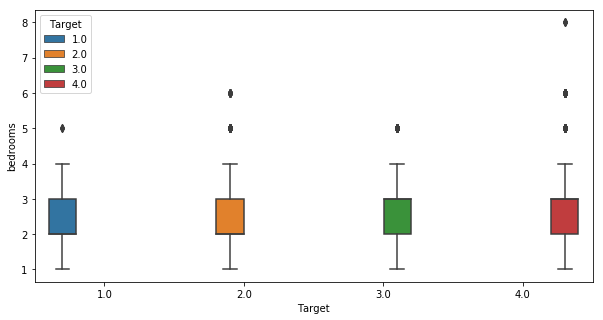



======= escolari =======


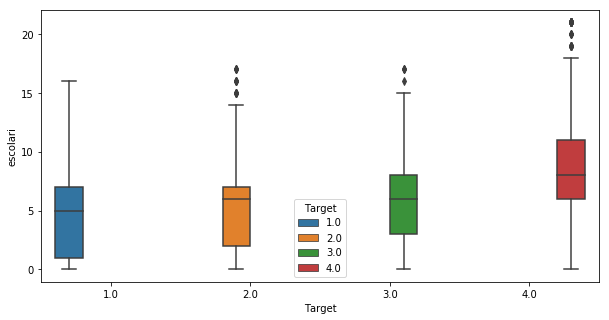



======= hhsize =======


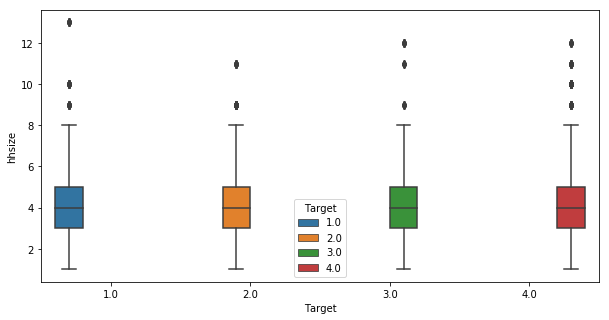



======= hogar_adul =======


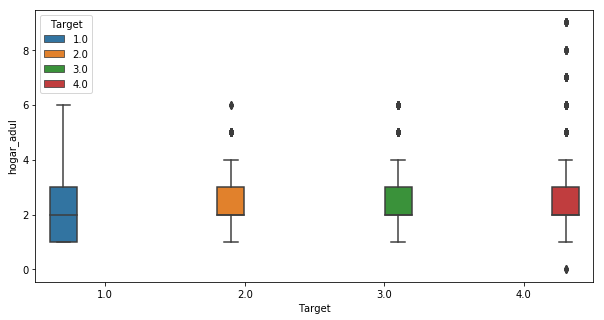



======= hogar_mayor =======


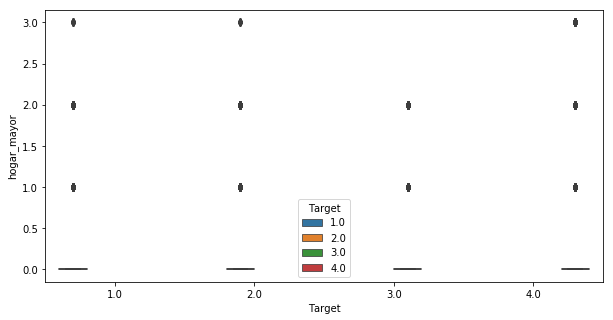



======= hogar_nin =======


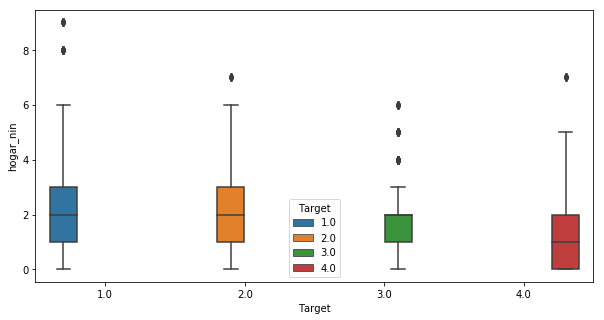



======= hogar_total =======


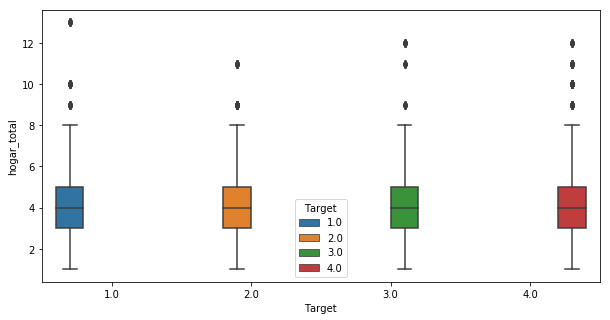



======= qmobilephone =======


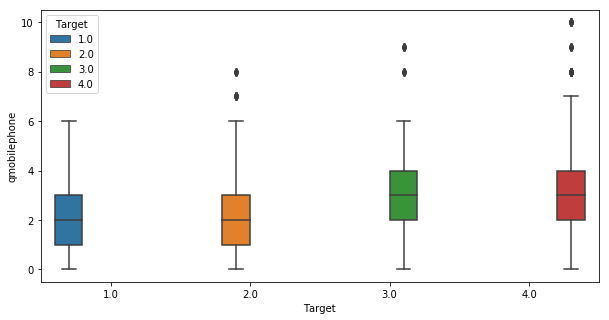



======= rez_esc =======


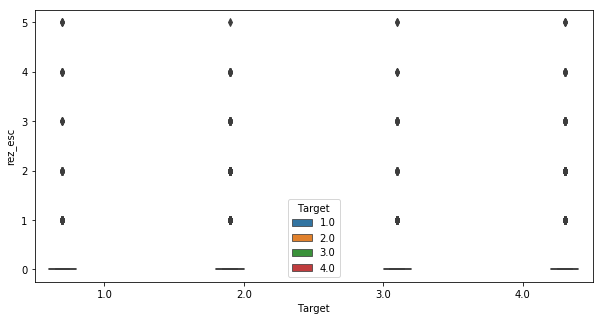



======= rooms =======


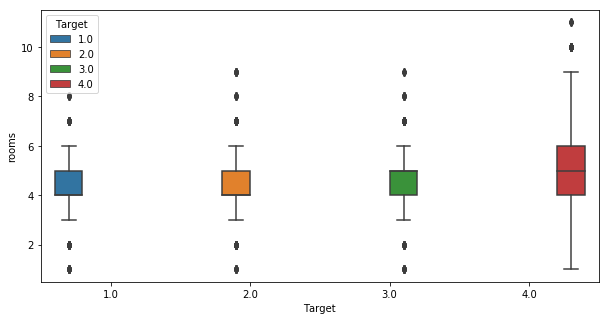



======= tamhog =======


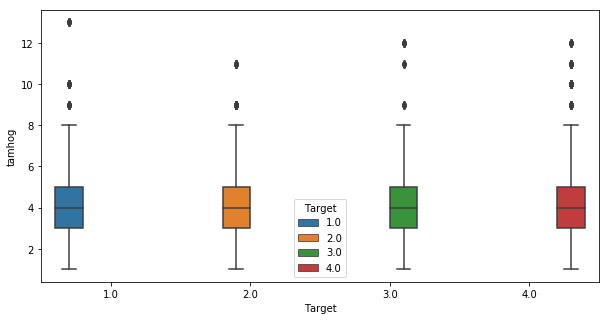



======= tamviv =======


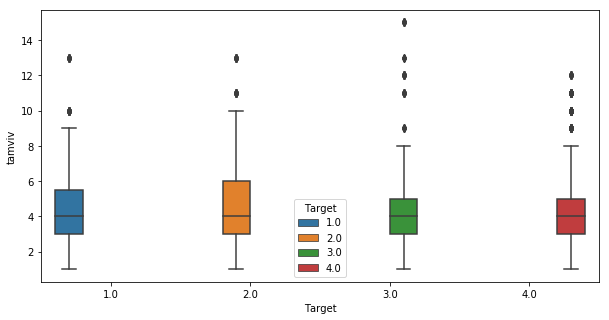



======= v18q1 =======


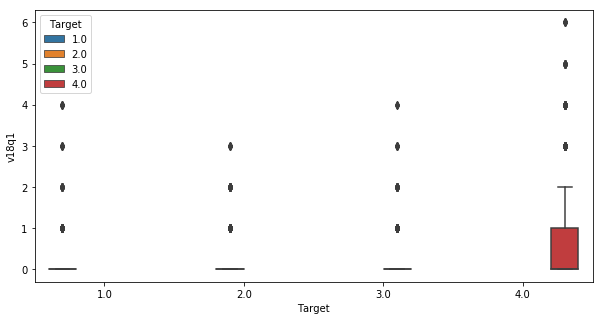



======= r4h1 =======


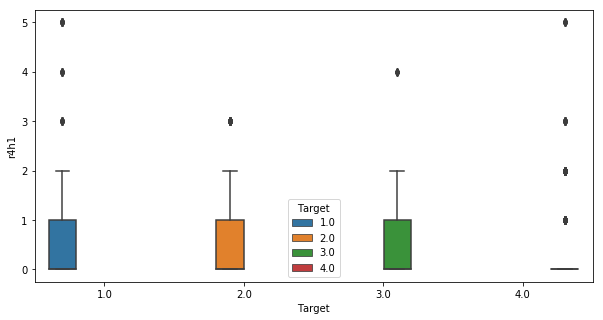



======= r4h2 =======


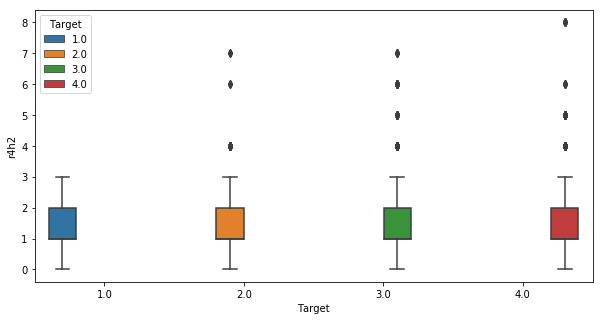



======= r4h3 =======


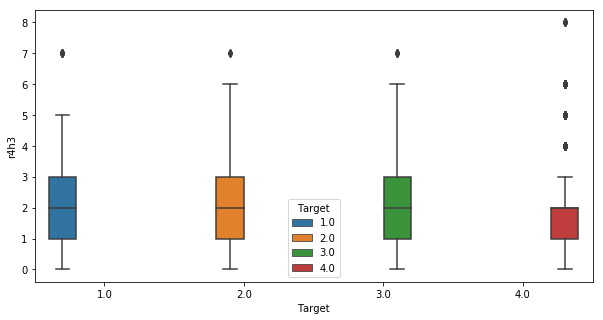



======= r4m1 =======


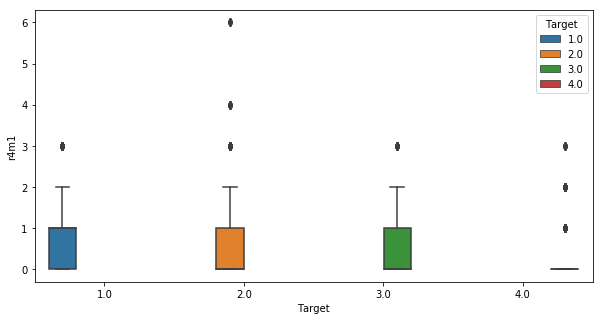



======= r4m2 =======


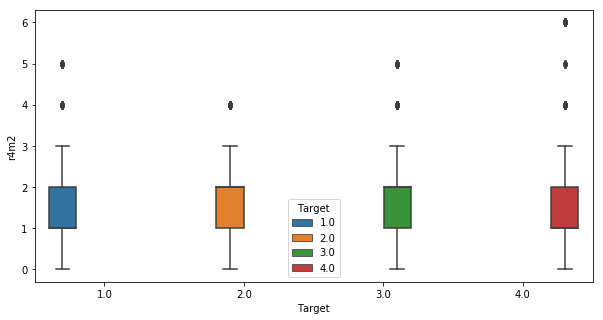



======= r4m3 =======


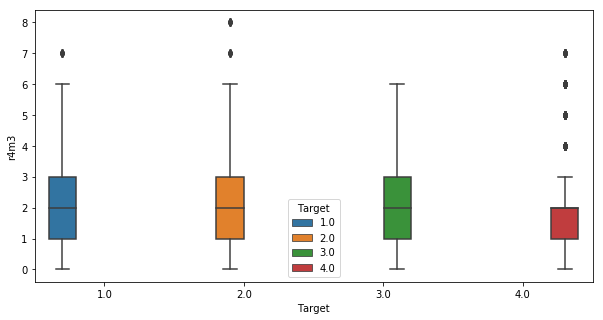



======= r4t1 =======


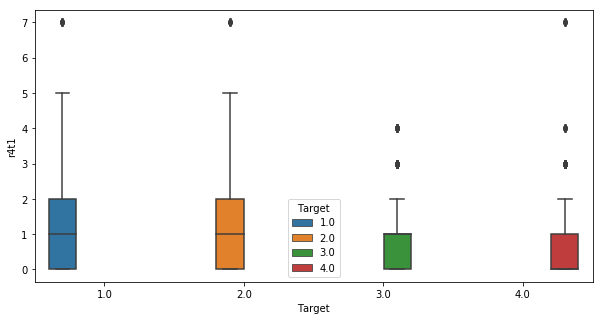



======= r4t2 =======


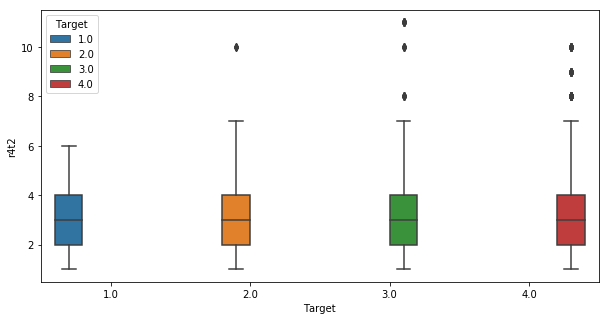



======= r4t3 =======


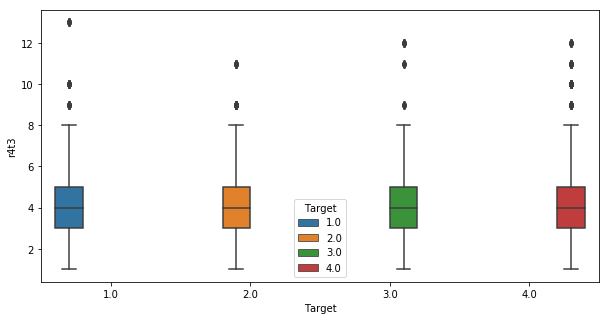

In [94]:
variables = ['bedrooms', 'escolari', 'hhsize', 'hogar_adul', 'hogar_mayor', 'hogar_nin', 
             'hogar_total', 'qmobilephone', 'rez_esc', 'rooms', 'tamhog', 'tamviv', 'v18q1', 
             'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3',]

for vr in variables:
    print('\n\n======= {} ======='.format(vr))
    f, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x='Target', y=vr, data=train, hue='Target', ax=ax)
    plt.show()

The graphs above seem to boradly agree with what we already know. Poorer households are more likely to be younger, overcrowded (same number of peopl in household, but less rooms), and have less men.

---
## Binary (ownership variables)

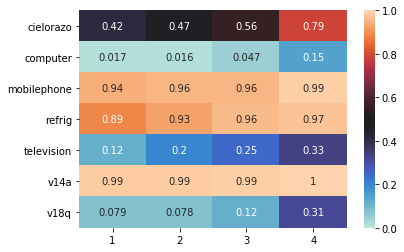

In [95]:
variables = ['cielorazo', 'computer', 'mobilephone', 'refrig', 'television', 'v14a', 'v18q']
vals = train.groupby('Target')[variables].mean().values
vals = np.flip(np.rot90(vals, k=3), axis=1)
sns.heatmap(vals, center=0.5, vmax=1.0, vmin=0.0, yticklabels=variables, 
            xticklabels=[1, 2, 3, 4], annot=True)
plt.show()

# it would be good to make a cross section here, maybe correlation

We can see that ownership of some things rises quite clearly and linearly as poverty decreases (cielings, refridgerator, television). Some thing rise quite sharply as poverty decreases (computer, tablets), and some don't really change(mobile phone, bathroom).

---
## Other Binary Variables

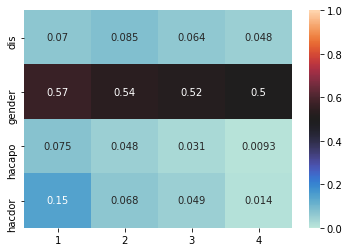

In [62]:
# binary encode gender binary*
female_male_map = dict(female=1, male=0)
train.gender = train.gender.replace(female_male_map).astype('int64')

variables = ['dis', 'gender', 'hacapo', 'hacdor']
vals = train.groupby('Target')[variables].mean().values
vals = np.flip(np.rot90(vals, k=3), axis=1)
sns.heatmap(vals, center=0.5, vmax=1.0, vmin=0.0, yticklabels=variables, 
            xticklabels=[1, 2, 3, 4], annot=True)
plt.show()

This graph doesn't present us with much new information. Overcrowding (by total rooms, and bedrooms) is more common in poorer househods, as are women. There doesn't seem to be a noticable connection between disability and poverty.

*this binary is encoded into the data, obviously things are not so simplistic in reality (e.g. https://en.wikipedia.org/wiki/LGBT_rights_in_Costa_Rica#Gender_identity_and_expression)